In [13]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
df = pd.read_excel("Palestinians_Tweets_data.xlsx")
df['Tweet'] = df.Tweet.astype('str')
df['Sentiment'] = df.Sentiment.astype('category')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2497 entries, 0 to 2496
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Tweet      2497 non-null   object  
 1   Sentiment  2497 non-null   category
dtypes: category(1), object(1)
memory usage: 22.2+ KB


In [5]:
df.sample(5)

,Tweet,Sentiment
1186,@BDSmovement We love you #BDS you are one of many that tries to fight back the stealing of our land and the racism we experience everyday from the zionist occupier. Millions continue to boycott the terrorist occupiers and even more are joining everyday as they become more and more aware ❤️,Positive
194,RT @AmalMohamedAB: The shortage in medicines in Gaza strip has reached 52%.\n\n#UNDay #Act4Palestine,Negative
2069,"RT @iamabdul_ch: The amount of hypocrisy in the world is really disgusting. Everyone was with the BLM movement, and everyone should be with Shiekh jarrah.. EVERYONE. #SaveSheikhJarrah #انقذوا_حي_الشيخ_جراح https://t.co/VHVjwZaP1k",Neutral
174,"Many international organizations say that life in Gaza isn't possible; however, they do nothing but saying words!\n\n#UNDay #Act4Palestine",Negative
108,"RT @MustbeQuared: My number one rule is hope for the best, plan for the worst. As far as I'm concerned, it's still a serious threat, until proven otherwise.\n\n#FreeMaherAlAkhras \n#Group4Palestine\n#SobatPalestinaINA https://t.co/CJNfee5bpR",Neutral


In [9]:
Sentiment_counts = df['Sentiment'].value_counts()

# Affichage des résultats
print("Nombre de catégories positives :", Sentiment_counts.get('Positive', 0))
print("Nombre de catégories négatives :", Sentiment_counts.get('Negative', 0))
print("Nombre de catégories neutres :", Sentiment_counts.get('Neutral', 0))

Nombre de catégories positives : 557
Nombre de catégories négatives : 1438
Nombre de catégories neutres : 502


In [16]:
# Convertir les valeurs de la colonne 'Sentiment' en minuscules
df['Sentiment'] = df['Sentiment'].str.lower()

# Compter les occurrences de chaque catégorie
Sentiment_counts = df['Sentiment'].value_counts()

# Trouver le nombre minimum d'occurrences parmi les catégories
min_count = min(Sentiment_counts)

# Échantillonner chaque catégorie pour égaliser les nombres
if min_count > 0:
    balanced_df = pd.concat([
        df[df['Sentiment'] == 'positive'].sample(n=min_count, replace=True),
        df[df['Sentiment'] == 'negative'].sample(n=min_count, replace=True),
        df[df['Sentiment'] == 'neutral'].sample(n=min_count, replace=True)
    ])

# Affichage des nouveaux comptages
if not balanced_df.empty:
    print("Nombre de catégories positives :", len(balanced_df[balanced_df['Sentiment'] == 'positive']))
    print("Nombre de catégories négatives :", len(balanced_df[balanced_df['Sentiment'] == 'negative']))
    print("Nombre de catégories neutres :", len(balanced_df[balanced_df['Sentiment'] == 'neutral']))

# Sauvegarder le nouveau df équilibré
    balanced_df.to_excel("balanced_df.xlsx", index=False)



Nombre de catégories positives : 502
Nombre de catégories négatives : 502
Nombre de catégories neutres : 502


In [15]:
# Number of empty rows
df["Tweet"].isnull().sum() # Prints 0
df["Sentiment"].isnull().sum() # Prints 0

0

In [17]:
df1 = pd.read_excel("balanced_df.xlsx")

In [20]:
# Converting all strings to lower characters
df1['Tweet'] = df1['Tweet'].str.lower()

In [21]:
# Removing links, hashtags, mentions, emojis and HTML entities
from re import compile, UNICODE
urlRE = r'[(http(s)?):\/\/(www\.)?a-z0-9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-z0-9@:%_\+.~#?&//=]*)'
hashtagRE = r'#[a-z0-9_]+'
mentionRE = r'@[a-z0-9_]+'
emojiRE = compile(
    "["u"\U0001F600-\U0001F64F" u"\U0001F300-\U0001F5FF"u"\U0001F680-\U0001F6FF"u"\U0001F1E0-\U0001F1FF""]+", flags=UNICODE)
HTMLentitiesRE = r'&[a-z0-9#]+;'
punctuationRE = r'[^\w\s]'
df1["Tweet"] = df1["Tweet"].str.replace(urlRE, "", regex=True)
df1["Tweet"] = df1["Tweet"].str.replace(hashtagRE, "", regex=True)
df1["Tweet"] = df1["Tweet"].str.replace(mentionRE, "", regex=True)
df1["Tweet"] = df1["Tweet"].str.replace(emojiRE, "", regex=True)
df1["Tweet"] = df1["Tweet"].str.replace(HTMLentitiesRE, "", regex=True)
df1["Tweet"] = df1["Tweet"].str.replace(r'\n', ' ', regex=True)
df1["Tweet"] = df1["Tweet"].str.replace(r'\brt\b', ' ', regex=True)
df1["Tweet"] = df1["Tweet"].str.replace(punctuationRE, ' ', regex=True)
df1["Tweet"] = df1["Tweet"].str.replace(r' +', ' ', regex=True) # Remplaces multiple spaces with one
df1["Tweet"] = df1["Tweet"].str.strip() # Removes all spaces from the start and end

In [40]:
df1['Sentiment_numeric'] = df1['Sentiment'].map({'positive': 1, 'negative': -1, 'neutral': 0})

In [41]:
nan_values = df1['Sentiment_numeric'].isna().sum()
print("Nombre de valeurs NaN dans la colonne Sentiment_numeric :", nan_values)

Nombre de valeurs NaN dans la colonne Sentiment_numeric : 0


In [24]:
import spacy
nlp = spacy.load("en_core_web_md")
def preprocess_text(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc if not token.is_stop])
df1["Processed_Tweet"] = df1["Tweet"].apply(preprocess_text)

In [42]:
from sklearn.model_selection import train_test_split
Tweet_train, Tweet_test, Sentiment_train, Sentiment_test = train_test_split(df1['Processed_Tweet'], df1['Sentiment_numeric'], test_size=0.3, random_state=4)

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
Tweet_train_vectors = vectorizer.fit_transform(Tweet_train)
Tweet_test_vectors = vectorizer.transform(Tweet_test)

In [46]:
from sklearn.svm import SVC
import numpy as np
# Training the SVM model
SVM_model = SVC(kernel='linear')
SVM_model.fit(Tweet_train_vectors, Sentiment_train)
# Getting predictions
Sentiment_predicted = SVM_model.predict(Tweet_test_vectors)

              precision    recall  f1-score   support

    negative       0.68      0.68      0.68       149
     neutral       0.64      0.69      0.66       147
    positive       0.81      0.76      0.78       156

    accuracy                           0.71       452
   macro avg       0.71      0.71      0.71       452
weighted avg       0.71      0.71      0.71       452



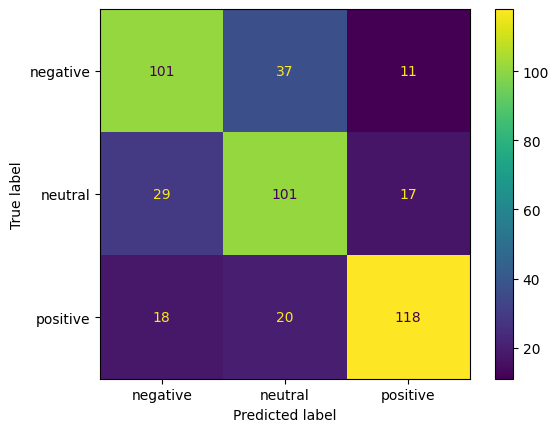

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
class_names = ['negative','neutral','positive']
ConfusionMatrixDisplay(confusion_matrix(Sentiment_test, Sentiment_predicted),display_labels=class_names).plot()
print(classification_report(Sentiment_test, Sentiment_predicted, target_names=class_names))

In [48]:
from joblib import dump
dump(SVM_model, 'SVM_model.joblib')
dump(vectorizer, 'vectorizer.joblib')

['vectorizer.joblib']